In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud


In [36]:
df = pd.read_csv("../data/processed/amazon_reviews_processed.csv")

In [37]:
df.head()

,review,ratings
0,This spray is really nice. It smells really go...,5.0
1,"This product does what I need it to do, I just...",4.0
2,"Smells good, feels great!",5.0
3,Felt synthetic,1.0
4,Love it,5.0


In [38]:
df.shape


(646939, 2)

In [39]:
df.isnull().sum()


review     0
ratings    0
dtype: int64

In [40]:
df.shape[0]


646939

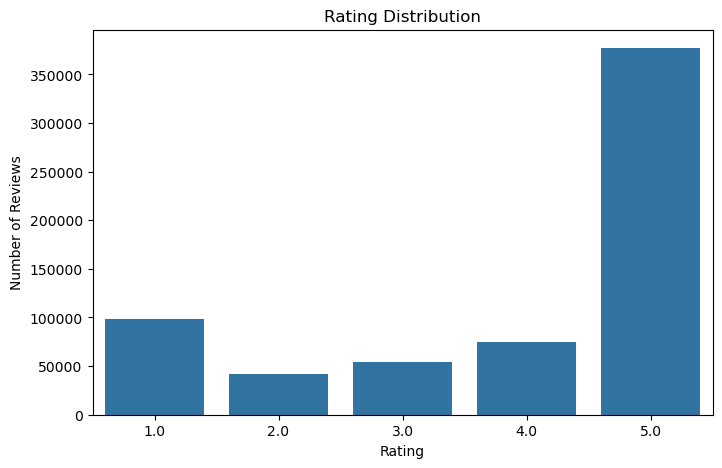

In [41]:
plt.figure(figsize=(8,5))
sns.countplot(x='ratings', data=df)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()


<h3>REVIEW LENGTH ANALYSIS</h3>

In [42]:
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))


In [43]:
df.groupby('ratings')['review_length'].mean()


ratings
1.0    31.099455
2.0    37.191572
3.0    39.706844
4.0    44.374817
5.0    33.171305
Name: review_length, dtype: float64

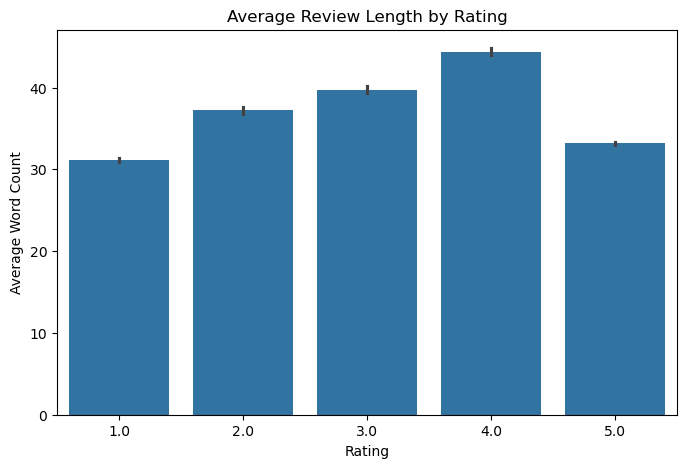

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(x='ratings', y='review_length', data=df)
plt.title("Average Review Length by Rating")
plt.xlabel("Rating")
plt.ylabel("Average Word Count")
plt.show()


<h3>SAFE WORD EXTRACTION</h3>

In [46]:
def get_top_words(text_series, n=20):
    words = " ".join(text_series.astype(str)).lower().split()
    return Counter(words).most_common(n)


In [47]:
for rating in sorted(df['ratings'].unique()):
    print(f"\nTop 20 words for Rating {rating}:")
    print(get_top_words(df[df['ratings'] == rating]['review']))



Top 20 words for Rating 1.0:
[('the', 134286), ('i', 106144), ('it', 83219), ('and', 80957), ('to', 69371), ('a', 60389), ('not', 55222), ('this', 48942), ('of', 39741), ('is', 39466), ('was', 36845), ('my', 36437), ('for', 30315), ('in', 26697), ('on', 24415), ('but', 23577), ('hair', 20497), ('that', 18999), ('like', 18927), ('have', 18068)]

Top 20 words for Rating 2.0:
[('the', 74450), ('i', 55377), ('it', 42922), ('and', 39111), ('to', 38109), ('a', 33044), ('not', 24096), ('is', 20941), ('this', 20159), ('of', 20096), ('my', 19555), ('but', 19114), ('for', 18576), ('was', 16652), ('in', 13605), ('on', 12153), ('that', 11288), ('have', 10484), ('with', 9996), ('hair', 9738)]

Top 20 words for Rating 3.0:
[('the', 102901), ('i', 76414), ('it', 60392), ('to', 53084), ('a', 51968), ('and', 50511), ('but', 32636), ('is', 31725), ('for', 28689), ('of', 27818), ('my', 27260), ('not', 26954), ('this', 24533), ('was', 19794), ('in', 18641), ('that', 17374), ('on', 16651), ('have', 15434)

<h3>WORD CLOUDS</h3>

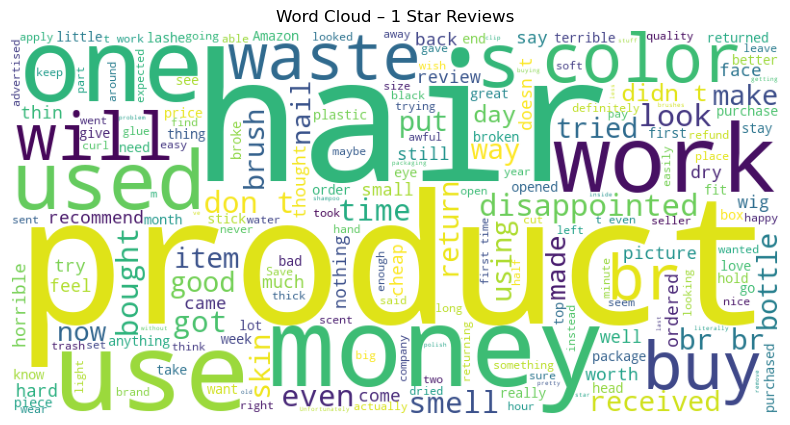

In [48]:
text_1 = " ".join(df[df['ratings'] == 1]['review'].astype(str))

wc1 = WordCloud(width=800, height=400, background_color='white').generate(text_1)
plt.figure(figsize=(10,5))
plt.imshow(wc1)
plt.axis("off")
plt.title("Word Cloud – 1 Star Reviews")
plt.show()


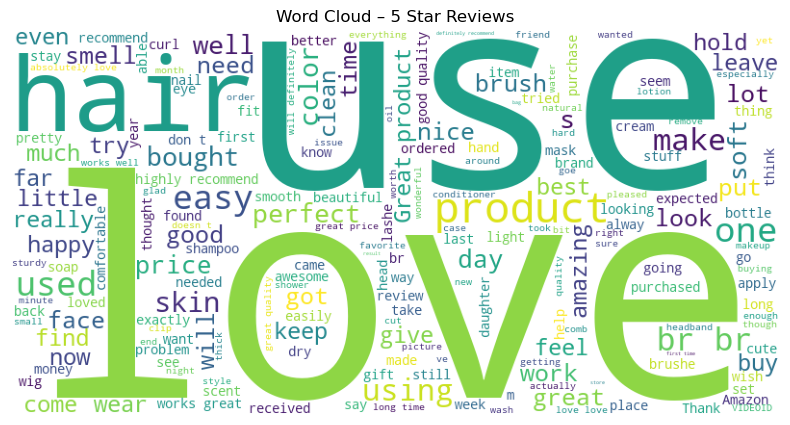

In [49]:
text_5 = " ".join(df[df['ratings'] == 5]['review'].astype(str))

wc5 = WordCloud(width=800, height=400, background_color='white').generate(text_5)
plt.figure(figsize=(10,5))
plt.imshow(wc5)
plt.axis("off")
plt.title("Word Cloud – 5 Star Reviews")
plt.show()
